# Análisis Exploratorio de datos

## Cargue de los datos

### Importación de librerías

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

### Funciones generales


In [81]:

def to_snake_case(text):
    text = re.sub('(.)([A-Z][a-z]+)', r'\1_/2', text)
    text = re.sub('([a-z0-9])([A-Z])', r'/1_/2', text)
    return text.lower().replace(' ', '_')


def convert_int_format(cadena):
    try:
        # Intentar convertir el string a float y luego a entero
        return str(int(float(cadena)))
    except ValueError:
        # Si no es un número, devolver el valor original
        return cadena
    
def delete_columns_by_word(df, palabras):
    df_deleted = df.loc[:, ~df.columns.str.contains(palabras, case=False)]
    print("Columnas eliminadas: ", df.columns.difference(df_deleted.columns))
    return df_deleted


### Seteo de rutas

In [82]:
sheet_field_names = 'Variables'
first_row_excels= 16
sheet_dict_values = 'Valores'

'''
path_dem_adults_catalog = './Data/DataDemografica/AdolescentesAdultos/ensafrec_ad2022_entrega_w.Catlogo.xlsx'
path_dem_adults_data = './Data/DataDemografica/AdolescentesAdultos/ensafrec_ad2022_entrega_w.csv'
path_food_adults_catalog = './Data/Alimentos/AdolescentesAdultos/ensafrec_ad2022_rec_w.Catlogo.xlsx'
path_food_adults_data = './Data/Alimentos/AdolescentesAdultos/ensafrec_ad2022_rec_w.csv'


path_dem_school_catalog = './Data/DataDemografica/Escolares/ensafrec_es2022_entrega_w.Catlogo.xlsx'
path_dem_school_data = './Data/DataDemografica/Escolares/ensafrec_es2022_entrega_w.csv'
path_food_school_catalog = './Data/Alimentos/Escolares/ensafrec_es2022_rec_w.Catlogo.xlsx'
path_food_school_data = './Data/Alimentos/Escolares/ensafrec_es2022_rec_w.csv'


path_dem_preschool_catalog = './Data/DataDemografica/Preescolares/ensafrec_pr2022_entrega_w.Catlogo.xlsx'
path_dem_preschool_data = './Data/DataDemografica/Preescolares/ensafrec_pr2022_entrega_w.csv'
path_food_preschool_catalog = './Data/Alimentos/Preescolares/ensafrec_pr2022_rec_w.Catlogo.xlsx'
path_food_preschool_data = './Data/Alimentos/Preescolares/ensafrec_pr2022_rec_w.csv'

path_anthropometric_catalog = './Data/Antropometria/ensaantro2022_entrega_w.Catlogo.xlsx'
path_anthropometric_data = './Data/Antropometria/ensaantro2022_entrega_w.csv'
'''

## Data adolescentes
path_dem_adults_catalog = '.\Data\DataDemografica\AdolescentesAdultos\ensafrec_ad2022_entrega_w.Catlogo.xlsx'
path_dem_adults_data = '.\Data\DataDemografica\AdolescentesAdultos\ensafrec_ad2022_entrega_w.csv'
path_food_adults_catalog = '.\Data\Alimentos\AdolescentesAdultos\ensafrec_ad2022_rec_w.Catlogo.xlsx'
path_food_adults_data = '.\Data\Alimentos\AdolescentesAdultos\ensafrec_ad2022_rec_w.csv'

## Data escolares

path_dem_school_catalog = '.\Data\DataDemografica\Escolares\ensafrec_es2022_entrega_w.Catlogo.xlsx'
path_dem_school_data = '.\Data\DataDemografica\Escolares\ensafrec_es2022_entrega_w.csv'
path_food_school_catalog = '.\Data\Alimentos\Escolares\ensafrec_es2022_rec_w.Catlogo.xlsx'
path_food_school_data = '.\Data\Alimentos\Escolares\ensafrec_es2022_rec_w.csv'

## Data preescolares

path_dem_preschool_catalog = '.\Data\DataDemografica\Preescolares\ensafrec_pr2022_entrega_w.Catlogo.xlsx'
path_dem_preschool_data = '.\Data\DataDemografica\Preescolares\ensafrec_pr2022_entrega_w.csv'
path_food_preschool_catalog = '.\Data\Alimentos\Preescolares\ensafrec_pr2022_rec_w.Catlogo.xlsx'
path_food_preschool_data = '.\Data\Alimentos\Preescolares\ensafrec_pr2022_rec_w.csv'

## Data antrhopometrica
path_anthropometric_catalog = '.\Data\Antropometria\ensaantro2022_entrega_w.Catlogo.xlsx'
path_anthropometric_data = '.\Data\Antropometria\ensaantro2022_entrega_w.csv'




### Lectura de datos

In [83]:
#Data adolescentes
## Datos demográficos

df_dem_adults_catalog = pd.read_excel(path_dem_adults_catalog, sheet_name=sheet_field_names, skiprows=first_row_excels)
df_dict_values_dem_adults = pd.read_excel(path_dem_adults_catalog, sheet_name=sheet_dict_values, skiprows=first_row_excels,decimal=',')
df_dem_adults_data_raw = pd.read_csv(path_dem_adults_data, sep=';')

## Datos de alimentación

df_food_adults_catalog = pd.read_excel(path_food_adults_catalog, sheet_name=sheet_field_names, skiprows=first_row_excels)
df_dict_values_food_adults = pd.read_excel(path_food_adults_catalog, sheet_name=sheet_dict_values, skiprows=first_row_excels,decimal=',')
df_food_adults_data_raw = pd.read_csv(path_food_adults_data, sep=';')

#Data escolares
## Datos demográficos

df_dem_school_catalog = pd.read_excel(path_dem_school_catalog, sheet_name=sheet_field_names, skiprows=first_row_excels)
df_dict_values_dem_school = pd.read_excel(path_dem_school_catalog, sheet_name=sheet_dict_values, skiprows=first_row_excels,decimal=',')
df_dem_school_data_raw = pd.read_csv(path_dem_school_data, sep=';')

## Datos de alimentación

df_food_school_catalog = pd.read_excel(path_food_school_catalog, sheet_name=sheet_field_names, skiprows=first_row_excels)
df_dict_values_food_school = pd.read_excel(path_food_school_catalog, sheet_name=sheet_dict_values, skiprows=first_row_excels,decimal=',')
df_food_school_data_raw = pd.read_csv(path_food_school_data, sep=';')

#Data preescolares
## Datos demográficos

df_dem_preschool_catalog = pd.read_excel(path_dem_preschool_catalog, sheet_name=sheet_field_names, skiprows=first_row_excels)
df_dict_values_dem_preschool = pd.read_excel(path_dem_preschool_catalog, sheet_name=sheet_dict_values, skiprows=first_row_excels,decimal=',')
df_dem_preschool_data_raw = pd.read_csv(path_dem_preschool_data, sep=';')

## Datos de alimentación

df_food_preschool_catalog = pd.read_excel(path_food_preschool_catalog, sheet_name=sheet_field_names, skiprows=first_row_excels)
df_dict_values_food_preschool = pd.read_excel(path_food_preschool_catalog, sheet_name=sheet_dict_values, skiprows=first_row_excels,decimal=',')
df_food_preschool_data_raw = pd.read_csv(path_food_preschool_data, sep=';')

#Data antropometrica

df_anthrop_catalog = pd.read_excel(path_anthropometric_catalog, sheet_name=sheet_field_names, skiprows=first_row_excels)
df_dict_values_anthrop = pd.read_excel(path_anthropometric_catalog, sheet_name=sheet_dict_values, skiprows=first_row_excels,decimal=',')
df_anthrop_data_raw = pd.read_csv(path_anthropometric_data, sep=';')


## Procesamiento de datos

Funciones de procesamiento de datos

In [84]:
def transform_df_dictionary(df):
    # Asignar nombres a las columnas
    df.columns = ['Valor', 'ID', 'Etiqueta']
    
    
    # Aplicar la función para convertir los valores en la columna 'ID'
    df['ID'] = df['ID'].apply(convert_int_format)
    
    # Rellenar los valores faltantes en la columna 'Valor' con el valor anterior
    df.fillna(method='ffill', inplace=True)
    
    # Agrupar por 'Valor' y crear el diccionario
    df = df.groupby('Valor').apply(lambda x: dict(zip(x['ID'], x['Etiqueta']))).reset_index()
    
    # Asignar los nuevos nombres de columna
    df.columns = ['Campo', 'Diccionario']
    
    return df



def procesar_dataframe(df_data, df_catalog, df_dict):
    
    # Iterar por cada columna en df_data
    for column in df_data.columns:
        # Verificar si la columna está en el catálogo
        if column in df_catalog['Variable'].values:
            # Verificar si la columna está en el DataFrame de diccionarios
            if column in df_dict['Campo'].values:
                print(f"Procesando columna: {column}")
                # Convertir valores de la columna usando convert_int_format
                df_data[column] = df_data[column].apply(convert_int_format)
                # Mapear los valores según el diccionario correspondiente
                df_data[column] = df_data[column].map(df_dict.loc[df_dict['Campo'] == column, 'Diccionario'].values[0])
            
            # Obtener el nuevo nombre de la columna del catálogo
            new_column_name = df_catalog.loc[df_catalog['Variable'] == column, 'Etiqueta'].values[0]
            # Renombrar la columna usando to_snake_case
            df_data = df_data.rename(columns={column: to_snake_case(new_column_name)})
    
    return df_data

### Procesamiento datos demográficos

Construcción de dataframe de diccionaros para los valores de los datos demográficos

In [85]:
df_dict_values_dem_adults = transform_df_dictionary(df_dict_values_dem_adults)
df_dict_values_dem_school = transform_df_dictionary(df_dict_values_dem_school)
df_dict_values_dem_preschool = transform_df_dictionary(df_dict_values_dem_preschool)
df_dict_values_dem_adults.head()

,Campo,Diccionario
0,completa,{'1': 'Favor de continuar (Entrevista Completa...
1,consumo,"{'1': 'Igual', '2': 'Mayor', '3': 'Menor'}"
2,estrato,"{'1': 'Rural ( <2500 Hab )', '2': 'Urbano ( 2..."
3,nota1,"{'1': '¿Acepta usted? ,,,, Sí', '2': '¿Acepta ..."
4,nota2,{'1': 'Favor de continuar'}


Ajuste de nombres de columna y valores de los datos demográficos

In [86]:
df_dem_adults_data = procesar_dataframe(df_dem_adults_data_raw, df_dem_adults_catalog, df_dict_values_dem_adults)
df_dem_school_data = procesar_dataframe(df_dem_school_data_raw, df_dem_school_catalog, df_dict_values_dem_school)
df_dem_preschool_data = procesar_dataframe(df_dem_preschool_data_raw, df_dem_preschool_catalog, df_dict_values_dem_preschool)

Procesando columna: nota1
Procesando columna: region
Procesando columna: sexo
Procesando columna: nota2
Procesando columna: consumo
Procesando columna: completa
Procesando columna: estrato
Procesando columna: nota1
Procesando columna: region
Procesando columna: sexo
Procesando columna: nota2
Procesando columna: consumo
Procesando columna: completa
Procesando columna: estrato
Procesando columna: nota1
Procesando columna: region
Procesando columna: sexo
Procesando columna: nota2
Procesando columna: consumo
Procesando columna: completa
Procesando columna: estrato


Se validan y homologan algunos nombres de columna que varían un poco

In [87]:
set(df_dem_adults_data.columns) - set(df_dem_school_data.columns)

{'frecuencia_de_consumo_en_adultos'}

In [88]:
set(df_dem_adults_data.columns) - set(df_dem_preschool_data.columns)

{'frecuencia_de_consumo_en_adultos'}

In [89]:
df_dem_adults_data.columns = ['frecuencia_de_consumo' if col.startswith('frecuencia_de_consumo') else col for col in df_dem_adults_data.columns]
df_dem_school_data.columns = ['frecuencia_de_consumo' if col.startswith('frecuencia_de_consumo') else col for col in df_dem_school_data.columns]
df_dem_preschool_data.columns = ['frecuencia_de_consumo' if col.startswith('frecuencia_de_consumo') else col for col in df_dem_preschool_data.columns]

In [90]:
df_dem_adults_data['grupo'] = 'Adolescentes y Adultos'
df_dem_school_data['grupo'] = 'Escolares'
df_dem_preschool_data['grupo'] = 'Preescolares'

Se eliminan las columnas de fecha, hora, duracion y tiempo, ya que no aportan información relevante para el análisis del problema definido en el alcance.

In [91]:
# Eliminar columnas que contengan en su nombre la palabra "fecha" o "hora"
palabras_clave = 'fecha|hora|tiempo|duración'
df_dem_adults_data = delete_columns_by_word(df_dem_adults_data, palabras_clave)
df_dem_school_data = delete_columns_by_word(df_dem_school_data, palabras_clave)
df_dem_preschool_data = delete_columns_by_word(df_dem_preschool_data, palabras_clave)


Columnas eliminadas:  Index(['duración_de_la__/2', 'duración_de_la__/2_1', 'duración_de_la__/2_2',
       'duración_de_la__/2_3', 'duración_de_la__/2_4', 'fecha_de__/2',
       'fecha_de__/2_1', 'fecha_de__/2_2', 'fecha_de__/2_3', 'fecha_de__/2_4',
       'fecha_de_inicio', 'fecha_termino_1', 'hora_de__/2', 'hora_de__/2_1',
       'hora_de__/2_2', 'hora_de__/2_3', 'hora_de__/2_4', 'hora_de_termino',
       'hora_termino_1', 'tiempo_hora', 'tiempo_minutos', 'tiempo_suma_fin',
       'tiempo_suma_inicio'],
      dtype='object')
Columnas eliminadas:  Index(['duración_de_la__/2', 'duración_de_la__/2_1', 'duración_de_la__/2_2',
       'duración_de_la__/2_3', 'duración_de_la__/2_4', 'fecha_de__/2',
       'fecha_de__/2_1', 'fecha_de__/2_2', 'fecha_de__/2_3', 'fecha_de__/2_4',
       'fecha_de_inicio', 'fecha_termino_1', 'hora_de__/2', 'hora_de__/2_1',
       'hora_de__/2_2', 'hora_de__/2_3', 'hora_de__/2_4', 'hora_de_termino',
       'hora_termino_1', 'tiempo_hora', 'tiempo_minutos', 'tiempo

Se genera un df consolidado con toda la data demográfica

In [92]:
df_dem_general = pd.concat([df_dem_adults_data, df_dem_school_data, df_dem_preschool_data], ignore_index=True)
df_dem_general.head()

,folio,folio_de_integrante,resultado_de_entrevista_1,resultado_de_entrevista_2,resultado_de_entrevista_3,resultado_de_entrevista_4,localizado,entidad,desc_ent,municipio,...,peso_promedio_de_tortilla_de_trigo,"¿considera_usted_que_el_consumo_que_reportó_fue_semejante_a_lo_que_come_normalmente?,_o_¿fue_mayor_o_menor?",¿_/2ún_comentario_de_la_entrevista?,resultado_de__/2,especifique_otro_resultado_de_entrevista,ponderador,estrato_urbanidad/ruralidad,__/2_de_seleccion,unidad_primaria_de_muestreo,grupo
0,2022_01001001,2022_01001001_01,1,0,0,0,1,1,01 AGUASCALIENTES,1,...,,Igual,,Favor de continuar (Entrevista Completa),,"8717,1854790009",Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
1,2022_01001028,2022_01001028_04,1,0,0,0,1,1,01 AGUASCALIENTES,1,...,25,Mayor,NINGUNO,Favor de continuar (Entrevista Completa),,"51475,173555678",Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
2,2022_01001034,2022_01001034_03,1,0,0,0,1,1,01 AGUASCALIENTES,1,...,34,Igual,NINGUNO,Favor de continuar (Entrevista Completa),,"16477,8557582843",Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
3,2022_01001041,2022_01001041_04,1,0,0,0,1,1,01 AGUASCALIENTES,1,...,,Mayor,,Favor de continuar (Entrevista Completa),,"11801,483709865",Metropolitano (100mil y + Hab),13,0100100011405,Adolescentes y Adultos
4,2022_01001042,2022_01001042_01,1,0,0,0,1,1,01 AGUASCALIENTES,1,...,,Igual,,Favor de continuar (Entrevista Completa),,"7032,17435561176",Metropolitano (100mil y + Hab),13,0100100011405,Adolescentes y Adultos


Se eliminan de manera inicial las columnas irrelevantes para el análisis:
- localizado: todos sus valores son iguales
- concentimiento_para_realizar_la_entrevista: todos los valores son iguales
- frecuencia_de_consumo: todos los valores son iguales
- ¿comentario_de_la_entrevista?: el alcance del proyecto no incluye aplicación de técnicas de NLP, por lo cual esté campo no es de utilidad
- resultado_de__/2: todos los valores son iguales
- especifique_otro_resultado_de_entrevista: todos los valores son iguales


In [93]:
list_columns_eliminate = ['localizado','concentimiento_para_realizar_la_entrevista','frecuencia_de_consumo','¿_/2ún_comentario_de_la_entrevista?','resultado_de__/2','especifique_otro_resultado_de_entrevista']
df_dem_general.drop(columns=list_columns_eliminate, inplace=True)

In [94]:
df_dem_general.columns

Index(['folio', 'folio_de_integrante', 'resultado_de_entrevista_1',
       'resultado_de_entrevista_2', 'resultado_de_entrevista_3',
       'resultado_de_entrevista_4', 'entidad', 'desc_ent', 'municipio',
       'desc_mun', 'region_o_zona_de_trabajo', 'edad_del__/2', 'sexo_del__/2',
       'peso_promedio_de_tortilla_de_maíz',
       'peso_promedio_de_tortilla_de_trigo',
       '¿considera_usted_que_el_consumo_que_reportó_fue_semejante_a_lo_que_come_normalmente?,_o_¿fue_mayor_o_menor?',
       'ponderador', 'estrato_urbanidad/ruralidad', '__/2_de_seleccion',
       'unidad_primaria_de_muestreo', 'grupo'],
      dtype='object')

Se ajustan los nombres de las columnas para que sean más cortos y descriptivos

In [95]:
dict_replace_names_dem = {'folio_de_integrante':'folio_integrante','resultado_de_entrevista_1':'resultado_ent1','resultado_de_entrevista_2':'resultado_ent2',
                          'resultado_de_entrevista_3':'resultado_ent3','resultado_de_entrevista_4':'resultado_ent4','region_o_zona_de_trabajo':'region',
                          'edad_del__/2':'edad','sexo_del__/2':'sexo','peso_promedio_de_tortilla_de_maíz':'peso_tortilla_maiz','peso_promedio_de_tortilla_de_trigo':'peso_tortilla_trigo',
                          '¿considera_usted_que_el_consumo_que_reportó_fue_semejante_a_lo_que_come_normalmente?,_o_¿fue_mayor_o_menor?':'consumo_semejante',
                          'estrato_urbanidad/ruralidad':'estrato','__/2_de_seleccion':'estrato_seleccion','unidad_primaria_de_muestreo':'upm'}
df_dem_general.columns = [dict_replace_names_dem.get(col, col) for col in df_dem_general.columns]
df_dem_general.head()

,folio,folio_integrante,resultado_ent1,resultado_ent2,resultado_ent3,resultado_ent4,entidad,desc_ent,municipio,desc_mun,...,edad,sexo,peso_tortilla_maiz,peso_tortilla_trigo,consumo_semejante,ponderador,estrato,estrato_seleccion,upm,grupo
0,2022_01001001,2022_01001001_01,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,51,Mujer,25,,Igual,"8717,1854790009",Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
1,2022_01001028,2022_01001028_04,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,26,Mujer,22,25,Mayor,"51475,173555678",Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
2,2022_01001034,2022_01001034_03,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,12,Hombre,27,34,Igual,"16477,8557582843",Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
3,2022_01001041,2022_01001041_04,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,12,Hombre,18,,Mayor,"11801,483709865",Metropolitano (100mil y + Hab),13,0100100011405,Adolescentes y Adultos
4,2022_01001042,2022_01001042_01,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,62,Mujer,18,,Igual,"7032,17435561176",Metropolitano (100mil y + Hab),13,0100100011405,Adolescentes y Adultos


In [96]:
# Convertir a numero algunas columnas numericas y están como string
list_columns_to_numeric = ['peso_tortilla_maiz','peso_tortilla_trigo','ponderador']
df_dem_general[list_columns_to_numeric] = df_dem_general[list_columns_to_numeric].apply(lambda x: x.str.replace(',', '.')).apply(pd.to_numeric, errors='coerce')


In [97]:
df_dem_general.shape

(1584, 21)

### Procesamiento datos de alimentación

Construcción de dataframe de diccionaros para los valores de los datos de alimentación

In [98]:
df_dict_values_food_adults = transform_df_dictionary(df_dict_values_food_adults)
df_dict_values_food_school = transform_df_dictionary(df_dict_values_food_school)
df_dict_values_food_preschool = transform_df_dictionary(df_dict_values_food_preschool)
df_dict_values_food_adults.head()

,Campo,Diccionario
0,esp_alim,"{'443': 'Leche en polvo entera', '445': 'Leche..."
1,estrato,"{'1': 'Rural ( <2500 Hab )', '2': 'Urbano ( 2..."
2,pa1,"{'0': 'Nunca', '1': '1 día', '2': '2 días', '3..."
3,pa2,"{'1': '1 vez', '2': '2 veces', '3': '3 veces',..."
4,pa3,"{'1': 'POCA', '2': 'MODERADA', '3': 'MUCHA', '..."


Reemplazo de valores en el DataFrame de alimentación

In [99]:
df_food_adults_data = procesar_dataframe(df_food_adults_data_raw, df_food_adults_catalog, df_dict_values_food_adults)
df_food_school_data = procesar_dataframe(df_food_school_data_raw, df_food_school_catalog, df_dict_values_food_school)
df_food_preschool_data = procesar_dataframe(df_food_preschool_data_raw, df_food_preschool_catalog, df_dict_values_food_preschool)

Procesando columna: pa1
Procesando columna: esp_alim
Procesando columna: pa2
Procesando columna: pa3
Procesando columna: estrato
Procesando columna: region
Procesando columna: pa1
Procesando columna: esp_alim
Procesando columna: pa2
Procesando columna: pa3
Procesando columna: estrato
Procesando columna: region
Procesando columna: pa1
Procesando columna: esp_alim
Procesando columna: pa2
Procesando columna: pa3
Procesando columna: estrato
Procesando columna: region


Creación de variable con el grupo al que corresponde la información

In [100]:
df_food_adults_data['grupo'] = 'Adolescentes y Adultos'
df_food_school_data['grupo'] = 'Escolares'
df_food_preschool_data['grupo'] = 'Preescolares'

Se homologan los nombres de las columnas

In [101]:
for i in range(len(df_food_adults_data.columns)):
    print(df_food_adults_data.columns[i],' - ' , df_food_school_data.columns[i], ' - ',df_food_preschool_data.columns[i])

folio  -  folio  -  folio
folio_de_integrante  -  folio_de_integrante  -  folio_de_integrante
entidad  -  entidad  -  entidad
desc_ent  -  desc_ent  -  desc_ent
municipio  -  municipio  -  municipio
desc_mun  -  desc_mun  -  desc_mun
identificador_de_alimento  -  id_alim__/2_de_alimento  -  id_alim__/2_de_alimento
alimento  -  alimento__/2  -  alimento__/2
porción_estándar  -  por_est__/2ón_estándar  -  por_est__/2ón_estándar
¿_/2ántos_días_comió_(tomó)_usted?  -  pa1_¿_/2ántos_días_comió_(tomó)_usted?  -  pa1_¿_/2ántos_días_comió_(tomó)_usted?
especifique_otra_leche  -  esp_alim__/2_otra_leche  -  esp_alim__/2_otra_leche
¿_/2ántas_veces_al_día_comió_(tomó)_usted?  -  pa2_¿_/2ántas_veces_al_día_comió_(tomó)_usted?  -  pa2_¿_/2ántas_veces_al_día_comió_(tomó)_usted?
tamaño_de_porción  -  pa3__/2ño_de_porción  -  pa3__/2ño_de_porción
número_de_porciones  -  pa4_número_de_porciones  -  pa4_número_de_porciones
ponderador  -  ponderador  -  ponderador
estrato_urbanidad/ruralidad  -  estrato_

In [102]:
df_food_school_data.columns = df_food_adults_data.columns
df_food_preschool_data.columns = df_food_adults_data.columns

Se genera un df consolidado con la información de alimentación

In [103]:
df_food_general = pd.concat([df_food_adults_data, df_food_school_data, df_food_preschool_data], ignore_index=True, axis=0)


In [104]:
df_food_general.columns

Index(['folio', 'folio_de_integrante', 'entidad', 'desc_ent', 'municipio',
       'desc_mun', 'identificador_de_alimento', 'alimento', 'porción_estándar',
       '¿_/2ántos_días_comió_(tomó)_usted?', 'especifique_otra_leche',
       '¿_/2ántas_veces_al_día_comió_(tomó)_usted?', 'tamaño_de_porción',
       'número_de_porciones', 'ponderador', 'estrato_urbanidad/ruralidad',
       '__/2_de_seleccion', 'unidad_primaria_de_muestreo', 'completa',
       'region', 'grupo'],
      dtype='object')

Se ajustan los nombres de las columnas para que sean más cortos y descriptivos

In [105]:
dict_replace_names_food = {'folio_de_integrante':'folio_integrante','identificador_de_alimento':'id_alimento','porción_estándar':'porcion_est',
                          '¿_/2ántos_días_comió_(tomó)_usted?':'dias_consumo','¿_/2ántas_veces_al_día_comió_(tomó)_usted?':'veces_al_dia','tamaño_de_porción':'tamaño_porcion',
                          'número_de_porciones':'num_porciones','estrato_urbanidad/ruralidad':'estrato','__/2_de_seleccion':'estrato_seleccion','unidad_primaria_de_muestreo':'upm'}
df_food_general.columns = [dict_replace_names_food.get(col, col) for col in df_food_general.columns]
df_food_general.head()

,folio,folio_integrante,entidad,desc_ent,municipio,desc_mun,id_alimento,alimento,porcion_est,dias_consumo,...,veces_al_dia,tamaño_porcion,num_porciones,ponderador,estrato,estrato_seleccion,upm,completa,region,grupo
0,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,Leche Liconsa,1 vaso (240 ml),Nunca,...,NaN,NaN,,"8717,1854790009",Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos
1,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,Otra leche opción A,1 vaso (240 ml),7 días,...,2 veces,ESTANDAR,1.00,"8717,1854790009",Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos
2,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,3,Otra leche opción B,1 vaso (240 ml),Nunca,...,NaN,NaN,,"8717,1854790009",Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos
3,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,4,Otra leche opción C,1 vaso (240 ml),Nunca,...,NaN,NaN,,"8717,1854790009",Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos
4,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,5,Leche preparada de sabor (chocolate u otro sabor),1 vaso (240 ml),Nunca,...,NaN,NaN,,"8717,1854790009",Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos


Se convierten las columnas que indican cantidades en numéricas.

In [106]:
df_food_general['dias_consumo'] = df_food_general['dias_consumo'].replace('Nunca', '0').str.extract('(\d+)').astype(float)
df_food_general['veces_al_dia'] = df_food_general['veces_al_dia'].replace('Nunca', '0').str.extract('(\d+)').astype(float)
# Convertir a numero algunas columnas numericas y están como string
list_columns_to_numeric = ['num_porciones','ponderador']
df_food_general[list_columns_to_numeric] = df_food_general[list_columns_to_numeric].apply(lambda x: x.str.replace(',', '.')).apply(pd.to_numeric, errors='coerce')
df_food_general.head()

,folio,folio_integrante,entidad,desc_ent,municipio,desc_mun,id_alimento,alimento,porcion_est,dias_consumo,...,veces_al_dia,tamaño_porcion,num_porciones,ponderador,estrato,estrato_seleccion,upm,completa,region,grupo
0,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,Leche Liconsa,1 vaso (240 ml),0.0,...,NaN,NaN,NaN,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos
1,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,Otra leche opción A,1 vaso (240 ml),7.0,...,2.0,ESTANDAR,1.0,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos
2,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,3,Otra leche opción B,1 vaso (240 ml),0.0,...,NaN,NaN,NaN,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos
3,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,4,Otra leche opción C,1 vaso (240 ml),0.0,...,NaN,NaN,NaN,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos
4,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,5,Leche preparada de sabor (chocolate u otro sabor),1 vaso (240 ml),0.0,...,NaN,NaN,NaN,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos


## Esto falta explicarlo técnicamente**

In [107]:
#with open('./Data/Inputs/food_category_data.json', 'r') as f:
with open('./Data/Inputs/food_category_data.json', 'r',encoding='utf-8') as f:
    food_groups = json.load(f)
    df_food_general['alimento_grupo'] = df_food_general['alimento'].map(lambda x: food_groups.get(x, {}).get('grupo', 'Unknown'))
    df_food_general['alimento_subgrupo'] = df_food_general['alimento'].map(lambda x: food_groups.get(x, {}).get('subgrupo', 'Unknown'))

#with open('./Data/Inputs/food_balance_data.json', 'r') as f:
with open('./Data/Inputs/food_balance_data.json', 'r',encoding='utf-8') as f:
    food_balance = json.load(f)
    df_food_general['alimento_balance'] = df_food_general['alimento'].map(food_balance)


print( df_food_general['alimento_grupo'].nunique() )
print( df_food_general['alimento_subgrupo'].nunique() )
print( df_food_general['alimento_balance'].nunique() )


10
12
5


Se pivotea el DataFrame para tener una columna por cada alimento y una fila por cada observación

In [108]:
df_food_general.head()

,folio,folio_integrante,entidad,desc_ent,municipio,desc_mun,id_alimento,alimento,porcion_est,dias_consumo,...,ponderador,estrato,estrato_seleccion,upm,completa,region,grupo,alimento_grupo,alimento_subgrupo,alimento_balance
0,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,Leche Liconsa,1 vaso (240 ml),0.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Comida balanceada
1,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,Otra leche opción A,1 vaso (240 ml),7.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Comida balanceada
2,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,3,Otra leche opción B,1 vaso (240 ml),0.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Comida balanceada
3,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,4,Otra leche opción C,1 vaso (240 ml),0.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Comida balanceada
4,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,5,Leche preparada de sabor (chocolate u otro sabor),1 vaso (240 ml),0.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Alto en azúcar


In [109]:
df_food_general.shape

(249044, 24)

df_food_pivot = df_food_general.pivot_table(index=['grupo','folio', 'folio_de_integrante', 'entidad', 'desc_ent', 'municipio',
       'desc_mun','ponderador', 'estrato_urbanidad/ruralidad',
       '__estrato_de_seleccion', 'unidad_primaria_de_muestreo', 'completa',
       'region'], columns='alimento_grupo', values=['¿_cuántos_días_comió_(tomó)_usted?', 'especifique_otra_leche',
       '¿_cuántas_veces_al_día_comió_(tomó)_usted?', 'tamaño_de_porción',
       'número_de_porciones'], aggfunc='first')


df_food_pivot.shape

df_food_pivot = df_food_pivot.reset_index()
df_food_pivot.columns = [''.join(col).strip() for col in df_food_pivot.columns.values]
df_food_pivot

### Procesamiento datos de antropométricos

Las sigueintes columnas son númericas, por lo que no aplica el reemplazo de valores, sin embargo se debe tener en cuenta que cuando se pone 222 o 999 es porque no se sabe el valor real, por lo que se debe tener en cuenta para el análisis.

In [110]:
antr_numerical_columns = ['an01_1', 'an01_2', 'an04_1', 'an04_2', 'an07', 'an12_1', 'an12_2', 'an15_1', 'an15_2','an17_1','an19','an21_1','an21_2','an23','an25','an27_01s',
                          'an27_01d', 'an27_02s', 'an27_02d', 'an27_03s', 'an27_03d' ]

Construcción de dataframe de diccionaros para los valores de los datos demográficos

In [111]:
df_dict_values_anthrop = transform_df_dictionary(df_dict_values_anthrop)
df_dict_values_anthrop.head()

,Campo,Diccionario
0,an01_1,{'222': 'No se pesó'}
1,an01_2,{'222': 'No se pesó'}
2,an02,"{'1': 'Ligera', '2': 'Gruesa', '3': 'Sin ropa'..."
3,an03,"{'1': 'Sin problema', '2': 'Problema físico', ..."
4,an04_1,{'222': 'No se midió'}


In [112]:
df_dict_values_anthrop = df_dict_values_anthrop[~df_dict_values_anthrop['Campo'].isin(antr_numerical_columns)]

Ajuste de nombres de columna y valores de los datos antropometricos

In [113]:
df_anthrop_data_raw.shape

(15073, 99)

In [114]:
df_antroph_data = procesar_dataframe(df_anthrop_data_raw, df_anthrop_catalog, df_dict_values_anthrop)

Procesando columna: nota1
Procesando columna: region
Procesando columna: h0302
Procesando columna: nota01
Procesando columna: an02
Procesando columna: an03
Procesando columna: nota02
Procesando columna: an05
Procesando columna: an06
Procesando columna: nota03
Procesando columna: an09
Procesando columna: nota04
Procesando columna: an10
Procesando columna: an11
Procesando columna: an13
Procesando columna: an14
Procesando columna: an16
Procesando columna: an18
Procesando columna: an20
Procesando columna: an22
Procesando columna: nota05
Procesando columna: an24
Procesando columna: an26
Procesando columna: nota06
Procesando columna: an29
Procesando columna: an30
Procesando columna: completa
Procesando columna: estrato


Se eliminan las columnas de fecha, hora, duracion y tiempo, ya que no aportan información relevante para el análisis del problema definido en el alcance.

In [116]:
palabras_clave = 'fecha|tiempo|duración'
df_antroph_data = delete_columns_by_word(df_antroph_data, palabras_clave)

Columnas eliminadas:  Index(['duración_de_la__/2', 'duración_de_la__/2_1', 'duración_de_la__/2_2',
       'duración_de_la__/2_3', 'duración_de_la__/2_4', 'fecha_de__/2',
       'fecha_de__/2_1', 'fecha_de__/2_2', 'fecha_de__/2_3', 'fecha_de__/2_4',
       'fecha_de_inicio', 'fecha_termino_1', 'tiempo_hora', 'tiempo_minutos',
       'tiempo_suma_fin', 'tiempo_suma_inicio'],
      dtype='object')


In [117]:
df_antroph_data.head()

,folio,folio_de_integrante,hora_de__/2_1,hora_termino_1,resultado_de_entrevista_1,hora_de__/2_2,hora_de__/2_2,resultado_de_entrevista_2,hora_de__/2_3,hora_de__/2_3,...,29._brazo_en_el_que_se_le_realizó_la_medición_de_la_tensión_arterial,30._resultado_de_la_medición,¿_/2ún_comentario_de_la_entrevista?,hora_de_termino,resultado_de__/2,especifique_otro_resultado_de_entrevista,ponderador,estrato_urbanidad/ruralidad,__/2_de_seleccion,unidad_primaria_de_muestreo
0,2022_01001001,2022_01001001_01,20:28:39,20:31:33,1,,,0,,,...,Brazo derecho,Sin problema,,20:31:33,ENTREVISTA COMPLETA,,"999,761285509631",Metropolitano (100mil y + Hab),13,0100100011320
1,2022_01001001,2022_01001001_02,20:26:30,20:28:37,1,,,0,,,...,NaN,NaN,,20:28:37,ENTREVISTA COMPLETA,,"1546,78591945017",Metropolitano (100mil y + Hab),13,0100100011320
2,2022_01001003,2022_01001003_02,20:31:35,20:36:37,1,,,0,,,...,Brazo derecho,Sin problema,,20:36:37,ENTREVISTA COMPLETA,,"2926,13359214152",Metropolitano (100mil y + Hab),13,0100100011320
3,2022_01001003,2022_01001003_03,18:00:46,19:29:56,1,,,0,,,...,Brazo derecho,Sin problema,"ta correcta de la 3° es de 89/43 , se coloca 8...",19:29:56,ENTREVISTA COMPLETA,,"1819,85902017304",Metropolitano (100mil y + Hab),13,0100100011320
4,2022_01001003,2022_01001003_06,20:36:38,20:37:59,1,,,0,,,...,NaN,NaN,,20:37:59,ENTREVISTA COMPLETA,,"4640,3577583505",Metropolitano (100mil y + Hab),13,0100100011320


Se eiliminan algunas columnas de horas que no son necesarias para el análisis del problema

In [119]:
list_columns_eliminate = ['hora_de__/2_1', 'hora_termino_1','hora_de__/2_2', 'hora_de__/2_2','hora_de__/2_3', 'hora_de__/2_3','hora_de__/2_4', 'hora_de__/2_4','hora_de__/2',
                          'hora_de_termino','28._hora_de_toma_de_tensión_arterial']
df_antroph_data.drop(columns=list_columns_eliminate, inplace=True)


In [120]:
df_antroph_data.columns

Index(['folio', 'folio_de_integrante', 'resultado_de_entrevista_1',
       'resultado_de_entrevista_2', 'resultado_de_entrevista_3',
       'resultado_de_entrevista_4', 'localizado', 'entidad', 'desc_ent',
       'municipio', 'desc_mun', 'concentimiento_para_realizar_la_entrevista',
       'region_o_zona_de_trabajo', 'sexo', 'edad', 'nota01',
       '1._ahora_voy_a_pesar_a_(nombre)_(primera_medición)',
       '1._ahora_voy_a_pesar_a_(nombre)_(segunda_medición)',
       '2._¿que_ropa_traía_puesta_(nombre)?', '3._resultado_de_la_medición',
       'nota02',
       '4._ahora_voy_a_medir_la_estatura_de_(nombre)_(primera_medición)',
       '4._ahora_voy_a_medir_la_estatura_de_(nombre)_(segunda_medición)',
       '5._resultado_de_la_medición', '6._usted_está...',
       '7._¿cuántos_meses_tiene_de_embarazo?', 'nota03',
       '8._ahora_voy_a_medir_la_cintura_de_(nombre)_(primera_medición)',
       '8._ahora_voy_a_medir_la_cintura_de_(nombre)_(segunda_medición)',
       '9._resultado_de_la_med

Se eliminan de manera inicial las columnas irrelevantes para el análisis:
- localizado: todos sus valores son iguales
- concentimiento_para_realizar_la_entrevista: todos los valores son iguales
- nota01: todos los valores son iguales
- nota02: todos los valores son iguales
- nota03: todos los valores son iguales
- nota05: todos los valores son iguales
- nota06: todos los valores son iguales
- resultado_de__/2: todos los valores son iguales
- especifique_otro_resultado_de_entrevista: todos los valores son iguales
- ¿_/2ún_comentario_de_la_entrevista?: fue del alcance técnicas de NLP


In [121]:
list_columns_eliminate = ['localizado','concentimiento_para_realizar_la_entrevista','nota01','nota02','nota03','nota05','nota06','resultado_de__/2','especifique_otro_resultado_de_entrevista']
df_antroph_data.drop(columns=list_columns_eliminate, inplace=True)

In [122]:
df_antroph_data.columns

Index(['folio', 'folio_de_integrante', 'resultado_de_entrevista_1',
       'resultado_de_entrevista_2', 'resultado_de_entrevista_3',
       'resultado_de_entrevista_4', 'entidad', 'desc_ent', 'municipio',
       'desc_mun', 'region_o_zona_de_trabajo', 'sexo', 'edad',
       '1._ahora_voy_a_pesar_a_(nombre)_(primera_medición)',
       '1._ahora_voy_a_pesar_a_(nombre)_(segunda_medición)',
       '2._¿que_ropa_traía_puesta_(nombre)?', '3._resultado_de_la_medición',
       '4._ahora_voy_a_medir_la_estatura_de_(nombre)_(primera_medición)',
       '4._ahora_voy_a_medir_la_estatura_de_(nombre)_(segunda_medición)',
       '5._resultado_de_la_medición', '6._usted_está...',
       '7._¿cuántos_meses_tiene_de_embarazo?',
       '8._ahora_voy_a_medir_la_cintura_de_(nombre)_(primera_medición)',
       '8._ahora_voy_a_medir_la_cintura_de_(nombre)_(segunda_medición)',
       '9._resultado_de_la_medición', 'nota04',
       '10._¿(nombre)_ha_perdido_peso_recientemente_(en_los_últimos_tres_meses)?',
   

Se ajustan los nombres de las columnas para que sean más cortos y descriptivos

In [125]:
dict_replace_names_antroph = column_mapping = {
    "folio_de_integrante": "folio_int",
    "resultado_de_entrevista_1": "resultado_ent1",
    "resultado_de_entrevista_2": "resultado_ent2",
    "resultado_de_entrevista_3": "resultado_ent3",
    "resultado_de_entrevista_4": "resultado_ent4",
    "region_o_zona_de_trabajo": "region",
    "1._ahora_voy_a_pesar_a_(nombre)_(primera_medición)": "peso_medicion1",
    "1._ahora_voy_a_pesar_a_(nombre)_(segunda_medición)": "peso_medicion2",
    "2._¿que_ropa_traía_puesta_(nombre)?": "ropa_puesta",
    "3._resultado_de_la_medición": "resultado_medicion_peso",
    "4._ahora_voy_a_medir_la_estatura_de_(nombre)_(primera_medición)": "estatura_medicion1",
    "4._ahora_voy_a_medir_la_estatura_de_(nombre)_(segunda_medición)": "estatura_medicion2",
    "5._resultado_de_la_medición": "resultado_medicion_estatura",
    "6._usted_está...": "estado_fisico",
    "7._¿cuántos_meses_tiene_de_embarazo?": "meses_embarazo",
    "8._ahora_voy_a_medir_la_cintura_de_(nombre)_(primera_medición)": "cintura_medicion1",
    "8._ahora_voy_a_medir_la_cintura_de_(nombre)_(segunda_medición)": "cintura_medicion2",
    "9._resultado_de_la_medición": "resultado_medicion_cintura",
    "10._¿(nombre)_ha_perdido_peso_recientemente_(en_los_últimos_tres_meses)?": "perdida_peso_reciente",
    "11._¿(nombre)_tiene_alguna_amputación?": "amputacion",
    "12._ahora_voy_a_pesar_a_(nombre)_(primera_medición)": "peso_medicion3",
    "12._ahora_voy_a_pesar_a_(nombre)_(segunda_medición)": "peso_medicion4",
    "13._¿que_ropa_traía_puesta_(nombre)?": "ropa_puesta2",
    "14._resultado_de_la_medición": "resultado_medicion_peso2",
    "15._ahora_voy_a_medir_la_estatura_de_(nombre)_(primera_medición)": "estatura_medicion3",
    "15._ahora_voy_a_medir_la_estatura_de_(nombre)_(segunda_medición)": "estatura_medicion4",
    "16._resultado_de_la_medición": "resultado_medicion_estatura2",
    "17._ahora_voy_a_medir_la_distancia_que_hay_entre_la_rodilla_y_su_talón_de_(nombre)_(primera_medición)": "distancia_rodilla_talon",
    "18._resultado_de_la_medición": "resultado_distancia_rodilla_talon",
    "19._ahora_voy_a_medir_la_circunferencia_de_la_pantorilla_de__(nombre)": "circunferencia_pantorrilla",
    "20._resultado_de_la_medición": "resultado_circunferencia_pantorrilla",
    "21._ahora_voy_a_medir_la_cintura_de__(nombre)_(primera_medición)": "cintura_medicion3",
    "21._ahora_voy_a_medir_la_cintura_de__(nombre)_(segunda_medición)": "cintura_medicion4",
    "22._resultado_de_la_medición": "resultado_medicion_cintura",
    "23.ahora_voy_a_medir_la_distancia_del_pecho_hacia_la_punta_de_su_dedo_medio_de_(nombre)_(primera_medición)": "distancia_pecho_dedo",
    "24._resultado_de_la_medición": "resultado_distancia_pecho_dedo",
    "25.ahora_voy_a_medir_la_circunferencia_media_del_brazo_de_(nombre)": "circunferencia_brazo",
    "26._resultado_de_la_medición": "resultado_circunferencia_brazo",
    "27._ahora_voy_a_tomar_la_tensión_arterial_de_(nombre)_(primera_medición)_sistolica": "presion_sistolica1",
    "27._ahora_voy_a_tomar_la_tensión_arterial_de_(nombre)_(primera_medición)_diastolica": "presion_diastolica1",
    "27._ahora_voy_a_tomar_la_tensión_arterial_de_(nombre)_(segunda_medición)_sistolica": "presion_sistolica2",
    "27._ahora_voy_a_tomar_la_tensión_arterial_de_(nombre)_(segunda_medición)_diastolica": "presion_diastolica2",
    "27._ahora_voy_a_tomar_la_tensión_arterial_de_(nombre)_(tercera_medición)__sistolica": "presion_sistolica3",
    "27._ahora_voy_a_tomar_la_tensión_arterial_de_(nombre)_(tercera_medición)_diastolica": "presion_diastolica3",
    "29._brazo_en_el_que_se_le_realizó_la_medición_de_la_tensión_arterial": "brazo_presion",
    "30._resultado_de_la_medición": "resultado_presion",
    "estrato_urbanidad/ruralidad": "estrato",
    "__/2_de_seleccion": "estrato_seleccion",
    "unidad_primaria_de_muestreo": "upm"
}

df_antroph_data.columns = [dict_replace_names_antroph.get(col, col) for col in df_antroph_data.columns]
df_antroph_data.head()

,folio,folio_int,resultado_ent1,resultado_ent2,resultado_ent3,resultado_ent4,entidad,desc_ent,municipio,desc_mun,...,presion_sistolica3,presion_diastolica3,28._hora_de_toma_de_tensión_arterial,brazo_presion,resultado_presion,¿_/2ún_comentario_de_la_entrevista?,ponderador,estrato,estrato_seleccion,upm
0,2022_01001001,2022_01001001_01,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,124,78,19:17,Brazo derecho,Sin problema,,"999,761285509631",Metropolitano (100mil y + Hab),13,0100100011320
1,2022_01001001,2022_01001001_02,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,,,,NaN,NaN,,"1546,78591945017",Metropolitano (100mil y + Hab),13,0100100011320
2,2022_01001003,2022_01001003_02,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,123,76,13:37,Brazo derecho,Sin problema,,"2926,13359214152",Metropolitano (100mil y + Hab),13,0100100011320
3,2022_01001003,2022_01001003_03,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,89,49,19:09,Brazo derecho,Sin problema,"ta correcta de la 3° es de 89/43 , se coloca 8...","1819,85902017304",Metropolitano (100mil y + Hab),13,0100100011320
4,2022_01001003,2022_01001003_06,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,,,,NaN,NaN,,"4640,3577583505",Metropolitano (100mil y + Hab),13,0100100011320


In [126]:
df_antroph_data.dtypes

folio                                   object
folio_int                               object
resultado_ent1                           int64
resultado_ent2                           int64
resultado_ent3                           int64
resultado_ent4                           int64
entidad                                  int64
desc_ent                                object
municipio                                int64
desc_mun                                object
region                                  object
sexo                                    object
edad                                     int64
peso_medicion1                          object
peso_medicion2                          object
ropa_puesta                             object
resultado_medicion_peso                 object
estatura_medicion1                      object
estatura_medicion2                      object
resultado_medicion_estatura             object
estado_fisico                           object
meses_embaraz

Convertir a numero algunas columnas numericas y están como string

In [129]:
list_columns_to_numeric = ['peso_medicion1','peso_medicion2','estatura_medicion1','estatura_medicion2','meses_embarazo','cintura_medicion1','cintura_medicion2',
                           'peso_medicion3','peso_medicion4','estatura_medicion3','estatura_medicion4','distancia_rodilla_talon','circunferencia_pantorrilla',
                           'cintura_medicion3','cintura_medicion4','distancia_pecho_dedo','circunferencia_brazo','presion_sistolica1','presion_diastolica1',
                           'presion_sistolica2','presion_diastolica2','presion_sistolica3','presion_diastolica3','ponderador']
df_antroph_data[list_columns_to_numeric] = df_antroph_data[list_columns_to_numeric].apply(lambda x: x.str.replace(',', '.')).apply(pd.to_numeric, errors='coerce')


### Dataframes finales

In [130]:
df_food_general.head()

,folio,folio_integrante,entidad,desc_ent,municipio,desc_mun,id_alimento,alimento,porcion_est,dias_consumo,...,ponderador,estrato,estrato_seleccion,upm,completa,region,grupo,alimento_grupo,alimento_subgrupo,alimento_balance
0,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,1,Leche Liconsa,1 vaso (240 ml),0.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Comida balanceada
1,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2,Otra leche opción A,1 vaso (240 ml),7.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Comida balanceada
2,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,3,Otra leche opción B,1 vaso (240 ml),0.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Comida balanceada
3,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,4,Otra leche opción C,1 vaso (240 ml),0.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Comida balanceada
4,2022_01001001,2022_01001001_01,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,5,Leche preparada de sabor (chocolate u otro sabor),1 vaso (240 ml),0.0,...,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,1,Centro Norte,Adolescentes y Adultos,Lácteos,Leche,Alto en azúcar


In [131]:
df_antroph_data.head()

,folio,folio_int,resultado_ent1,resultado_ent2,resultado_ent3,resultado_ent4,entidad,desc_ent,municipio,desc_mun,...,presion_sistolica3,presion_diastolica3,28._hora_de_toma_de_tensión_arterial,brazo_presion,resultado_presion,¿_/2ún_comentario_de_la_entrevista?,ponderador,estrato,estrato_seleccion,upm
0,2022_01001001,2022_01001001_01,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,124.0,78.0,19:17,Brazo derecho,Sin problema,,999.761286,Metropolitano (100mil y + Hab),13,0100100011320
1,2022_01001001,2022_01001001_02,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,NaN,NaN,,NaN,NaN,,1546.785919,Metropolitano (100mil y + Hab),13,0100100011320
2,2022_01001003,2022_01001003_02,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,123.0,76.0,13:37,Brazo derecho,Sin problema,,2926.133592,Metropolitano (100mil y + Hab),13,0100100011320
3,2022_01001003,2022_01001003_03,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,89.0,49.0,19:09,Brazo derecho,Sin problema,"ta correcta de la 3° es de 89/43 , se coloca 8...",1819.859020,Metropolitano (100mil y + Hab),13,0100100011320
4,2022_01001003,2022_01001003_06,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,NaN,NaN,,NaN,NaN,,4640.357758,Metropolitano (100mil y + Hab),13,0100100011320


In [132]:
df_dem_general.head()

,folio,folio_integrante,resultado_ent1,resultado_ent2,resultado_ent3,resultado_ent4,entidad,desc_ent,municipio,desc_mun,...,edad,sexo,peso_tortilla_maiz,peso_tortilla_trigo,consumo_semejante,ponderador,estrato,estrato_seleccion,upm,grupo
0,2022_01001001,2022_01001001_01,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,51,Mujer,25.0,NaN,Igual,8717.185479,Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
1,2022_01001028,2022_01001028_04,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,26,Mujer,22.0,25.0,Mayor,51475.173556,Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
2,2022_01001034,2022_01001034_03,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,12,Hombre,27.0,34.0,Igual,16477.855758,Metropolitano (100mil y + Hab),13,0100100011320,Adolescentes y Adultos
3,2022_01001041,2022_01001041_04,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,12,Hombre,18.0,NaN,Mayor,11801.483710,Metropolitano (100mil y + Hab),13,0100100011405,Adolescentes y Adultos
4,2022_01001042,2022_01001042_01,1,0,0,0,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,...,62,Mujer,18.0,NaN,Igual,7032.174356,Metropolitano (100mil y + Hab),13,0100100011405,Adolescentes y Adultos


## Análisis exploratorio

1. ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
    El conjunto de datos tiene información de consumo de alimentos de la población mexicana. Existen casos donde las personas no consumen alimentos especificos. En este caso no es datos faltantes, si no las características de la persona.
    En los datos demograficos y de antropometria las columnas de fecha y hora se encuentran vacias. Sin embargo, estos datos no son necesarios para el proyecto.

    Christian

2. ¿Cuáles son las estadísticas resumidas del conjunto de datos?
    Jesus

In [45]:

print("Estadísticas del conjunto de datos de alimentos")
print( df_food_general.describe())

print("Estadísticas del conjunto de datos de demograficos")
print( df_dem_general.describe())

print("Estadísticas del conjunto de datos de antropometria")
print( df_anthrop_data_raw.describe())


 

Estadísticas del conjunto de datos de alimentos
             entidad      municipio  identificador_de_alimento  \
count  249044.000000  249044.000000              154331.000000   
mean       16.010171      35.560897                  79.000000   
std         8.763407      51.712024                  45.321224   
min         1.000000       1.000000                   1.000000   
25%         9.000000       7.000000                  40.000000   
50%        15.000000      20.000000                  79.000000   
75%        23.000000      42.000000                 118.000000   
max        32.000000     515.000000                 157.000000   

       __estrato_de_seleccion  completa  id_alim__identificador_de_alimento  \
count           249044.000000  192796.0                        94713.000000   
mean               162.226594       1.0                           79.296939   
std                 87.543182       0.0                           45.493642   
min                 11.000000       1.0  

3. ¿Hay valores atípicos en el conjunto de datos?
    En el conjunto de datos de alimentos los boxplots muestran datos atipicos en la columna de municipio. Esto se debe a que la mayoria de los datos vienen de las grandes ciudades como CDMX, Monterrey y Guadalajara.
    En el conjunto de datos demograficos y de datos de antropometria se puede observar valores atipicos en las fechas de nacimiento. Esta variacion en los datos es de esperarse por el gran tamaño del dataset y por que las encuestas se hicieron en la poblacion en general que incluye personas de todas las edades. Para este caso vamos a revisar con la Dra. Cristina Chuck si queremos limitar el analisis a ciertas edades o toda la poblacion.

    Carlos

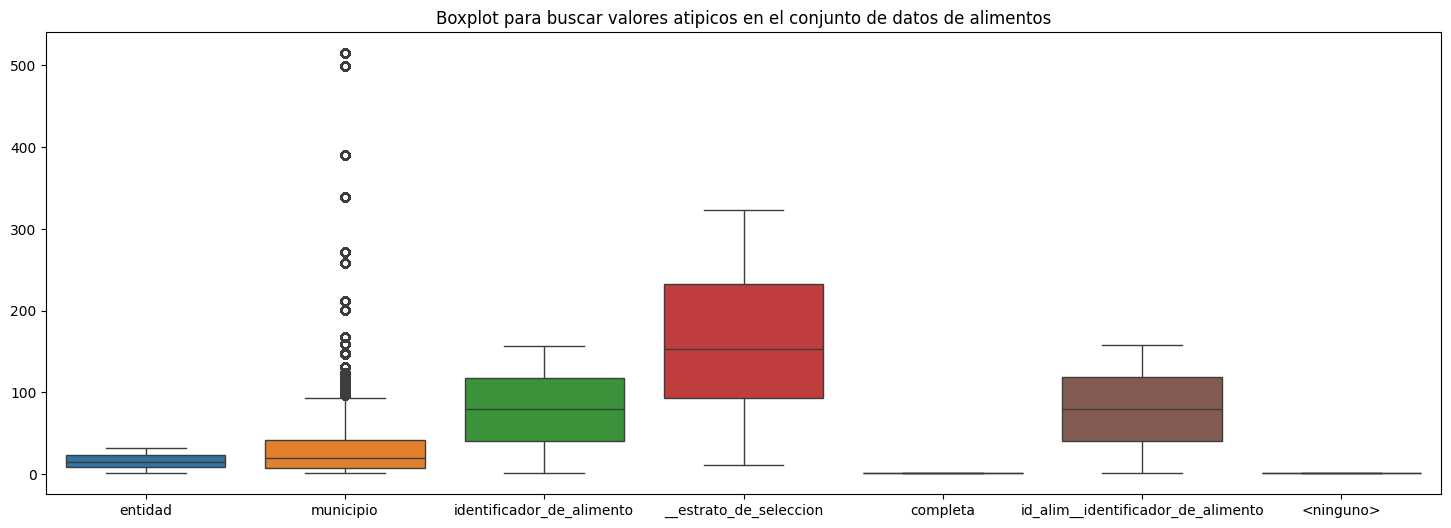

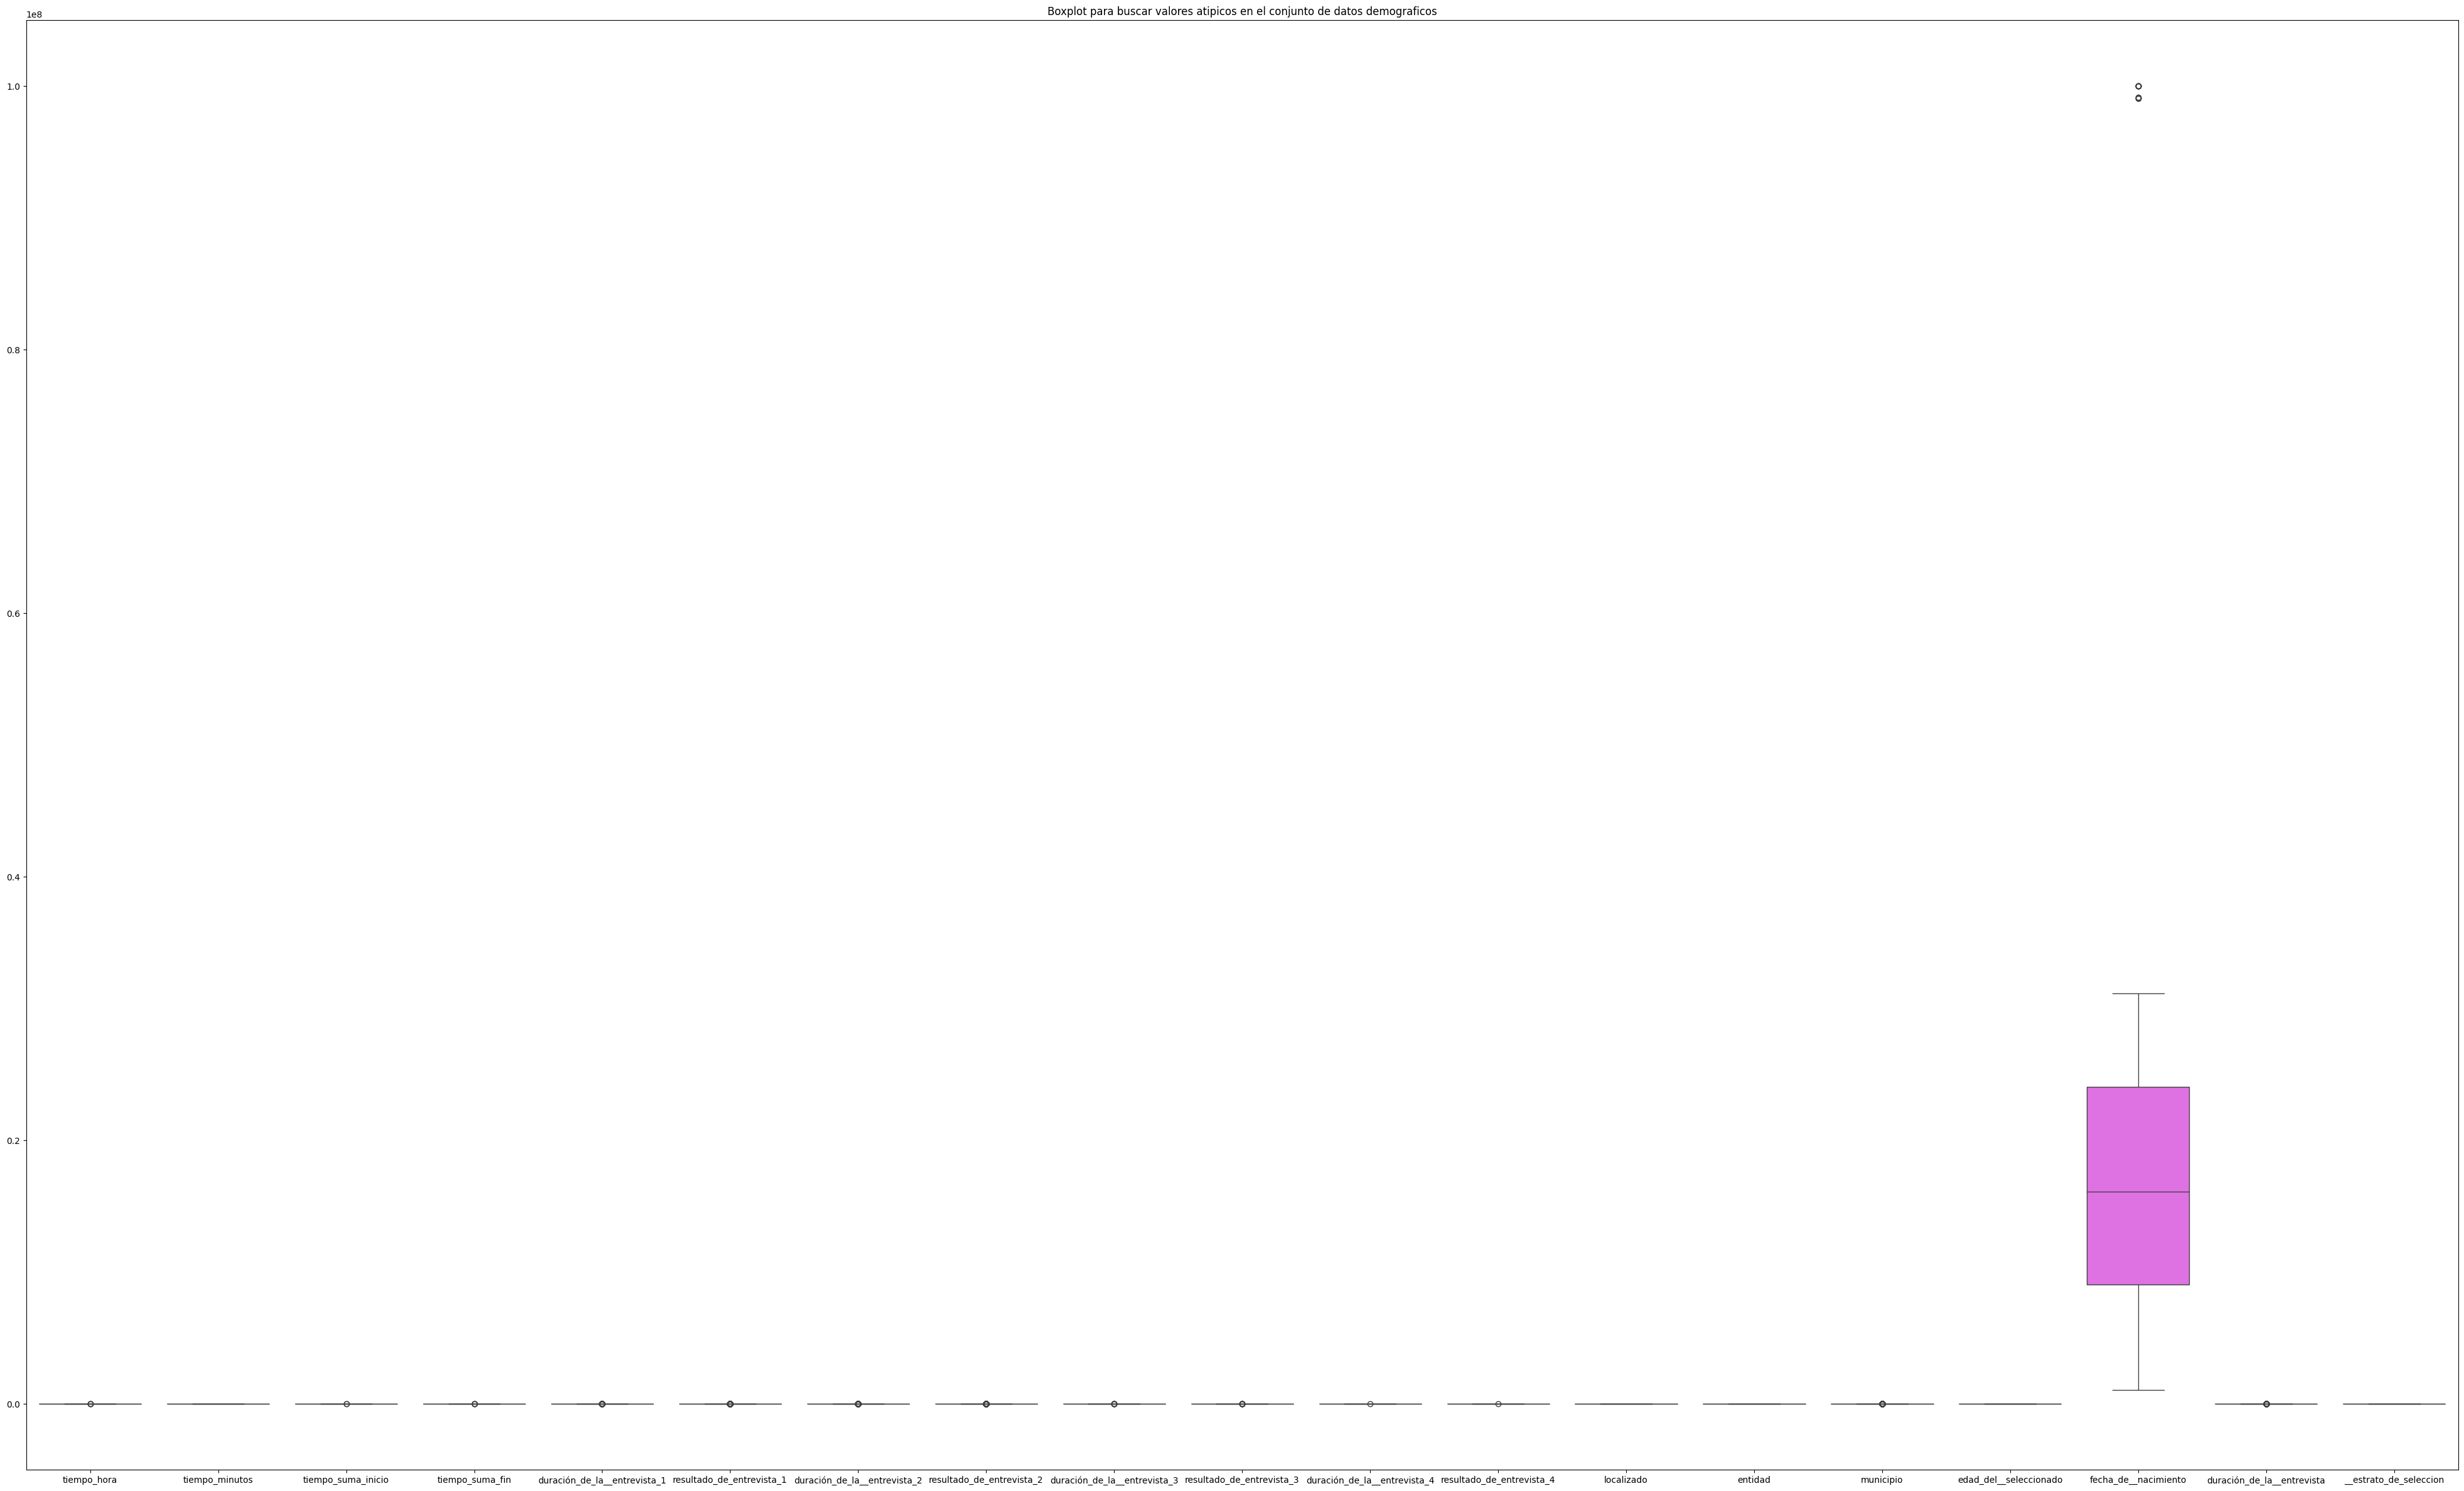

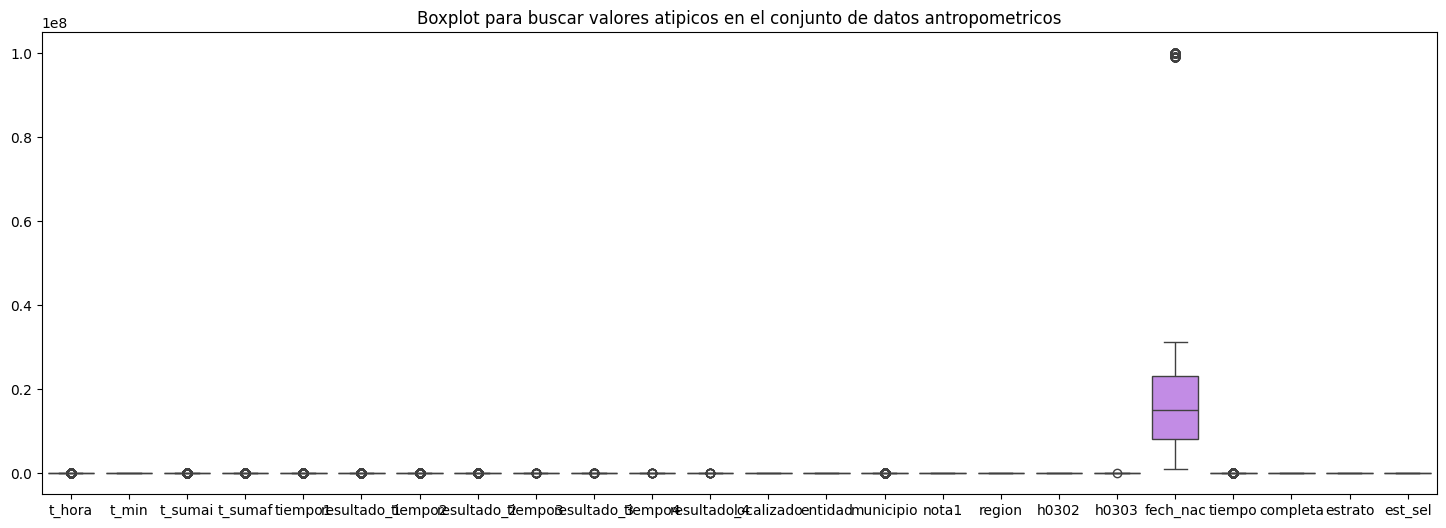

In [51]:

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_food_general)
plt.title("Boxplot para buscar valores atipicos en el conjunto de datos de alimentos")
plt.show()

plt.figure(figsize=(50, 30))
sns.boxplot(data=df_dem_general)
plt.title("Boxplot para buscar valores atipicos en el conjunto de datos demograficos")
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_anthrop_data_raw)
plt.title("Boxplot para buscar valores atipicos en el conjunto de datos antropometricos")
plt.show()

4. ¿Cuál es la cardinalidad de las variables categóricas?
    
    Las variables categoricas del conjunto de datos de alimentos son:
        1. Grupo
        2. 


    Jesus



5. ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
    Christian
6. ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
    Carlos
7. ¿Hay correlación entre las variables dependientes e independientes?
    Christian
8. ¿Cómo se distribuyen los datos en función de diferentes categorías?
    Jesus
9. ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
    Carlos

10. ¿Se deberían normalizar las imágenes para visualizarlas mejor?
    No tenemos imagenes dado la naturaleza del proyecto.
11. ¿Hay desequilibrio en las clases de la variable objetivo?
    No tenemos variable objetivo dado la naturaleza del proyecto.


FRECUENCIA DE CONSUMO EN ADULTOS = 
ID_ALIM Identificador de alimento = 

Pendientes:
- Revisar aleatoriamente si el procesamiento quedó bien
- Explicar la cartegorización que se hizo de alimentos
- Mirar como incluir la ponderación en la etapa de clustering y cálculo del índice
- Analizar si se pueden combinar todos los df en un solo, sino se debe decidir como se analizarán sus relaciones
- Validar contra las encuestas que todas las columnas importantes estén y sus tipos sean los correctos.

Ideas:
- Crear grupos de alimentos para que no sean tantos

Notas corrida:
- En algunos archivos del catálogo los últimos dos campos no tienen etiqueta, se deben poner de manera manual en el Excel.